In [3]:
from importlib import reload

import octopus.dataset as ds
import octopus.visualization.plotting as vis
from octopus.core import metrics
from octopus.preprocessing import compute_grad_image

In [4]:
scans, inits, gts = ds.load_dataset()

idx_list = list(scans.keys())

In [5]:
grads = dict()
c = 0
for i in idx_list:
    c += 1
    grads[i] = compute_grad_image(scans[i])
    print(f'Completed scan {c}/{len(idx_list)}')

Completed scan 1/524
Completed scan 2/524
Completed scan 3/524
Completed scan 4/524
Completed scan 5/524
Completed scan 6/524
Completed scan 7/524
Completed scan 8/524
Completed scan 9/524
Completed scan 10/524
Completed scan 11/524
Completed scan 12/524
Completed scan 13/524
Completed scan 14/524
Completed scan 15/524
Completed scan 16/524
Completed scan 17/524
Completed scan 18/524
Completed scan 19/524
Completed scan 20/524
Completed scan 21/524
Completed scan 22/524
Completed scan 23/524
Completed scan 24/524
Completed scan 25/524
Completed scan 26/524
Completed scan 27/524
Completed scan 28/524
Completed scan 29/524
Completed scan 30/524
Completed scan 31/524
Completed scan 32/524
Completed scan 33/524
Completed scan 34/524
Completed scan 35/524
Completed scan 36/524
Completed scan 37/524
Completed scan 38/524
Completed scan 39/524
Completed scan 40/524
Completed scan 41/524
Completed scan 42/524
Completed scan 43/524
Completed scan 44/524
Completed scan 45/524
Completed scan 46/5

In [6]:
i = idx_list[50]
test_scan = scans[i]
test_init = inits[i]
test_gt = gts[i]
test_grad = grads[i]

In [7]:
reload(vis)
reload(metrics)

<module 'octopus.core.metrics' from '/Users/uzaykaradag/Developer/octopus/octopus/core/metrics.py'>

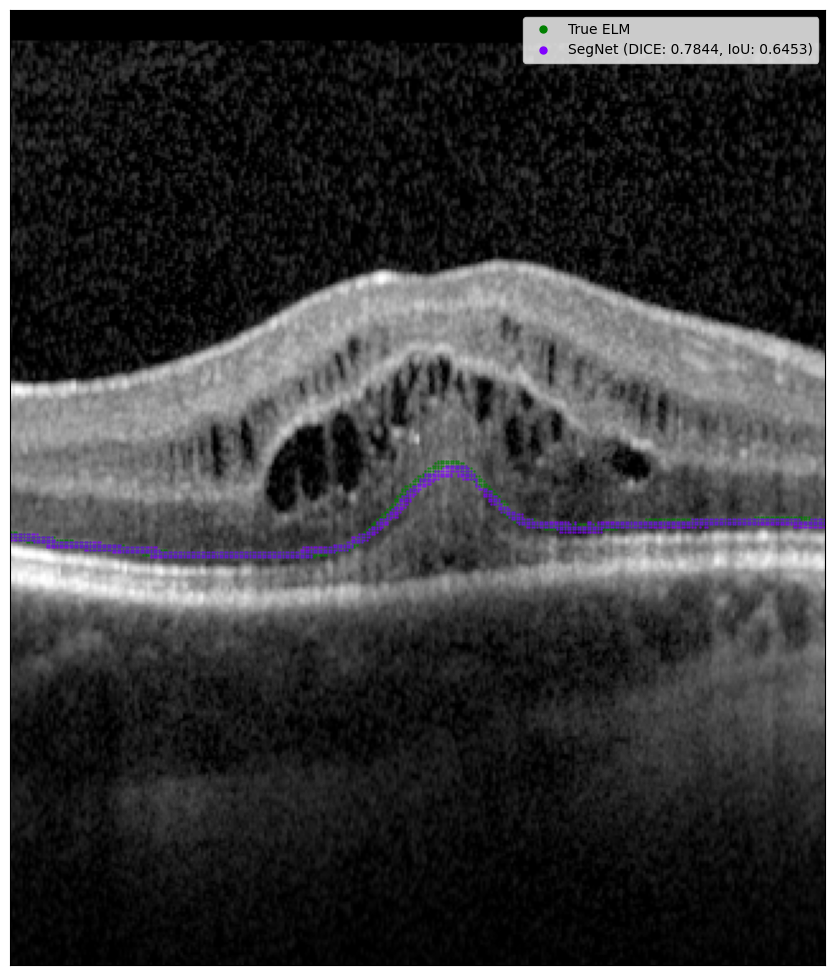

In [34]:
figs = {}
figs['SegNet'] = vis.display_scan(test_scan, {'SegNet': test_init}, gt_elm=test_gt)

## Comparison of different kernels with different parameter settings

In [9]:
rational_quad1 = {
    'kernel': 'RationalQuadratic',
    'sigma_f': 1.0,
    'length_scale': 2.5,
    'alpha': 2.0
}

exp_sine_sq1 = {
    'kernel': 'ExpSineSquared',
    'sigma_f': 1.0,
    'length_scale': 2.5,
    'period': 50.0
}

matern1 = {
    'kernel': 'Matern',
    'sigma_f': 1.0,
    'length_scale': 2.5,
    'nu': 2.5
}

In [13]:
from octopus.core import predict

rq = predict.trace_elm(test_grad, test_init, num_runs=100)

In [16]:
ess = predict.trace_elm(test_grad, test_init, kernel_options=exp_sine_sq1, num_runs=100)


In [22]:
m = predict.trace_elm(test_grad, test_init, kernel_options=matern1, num_runs=100)

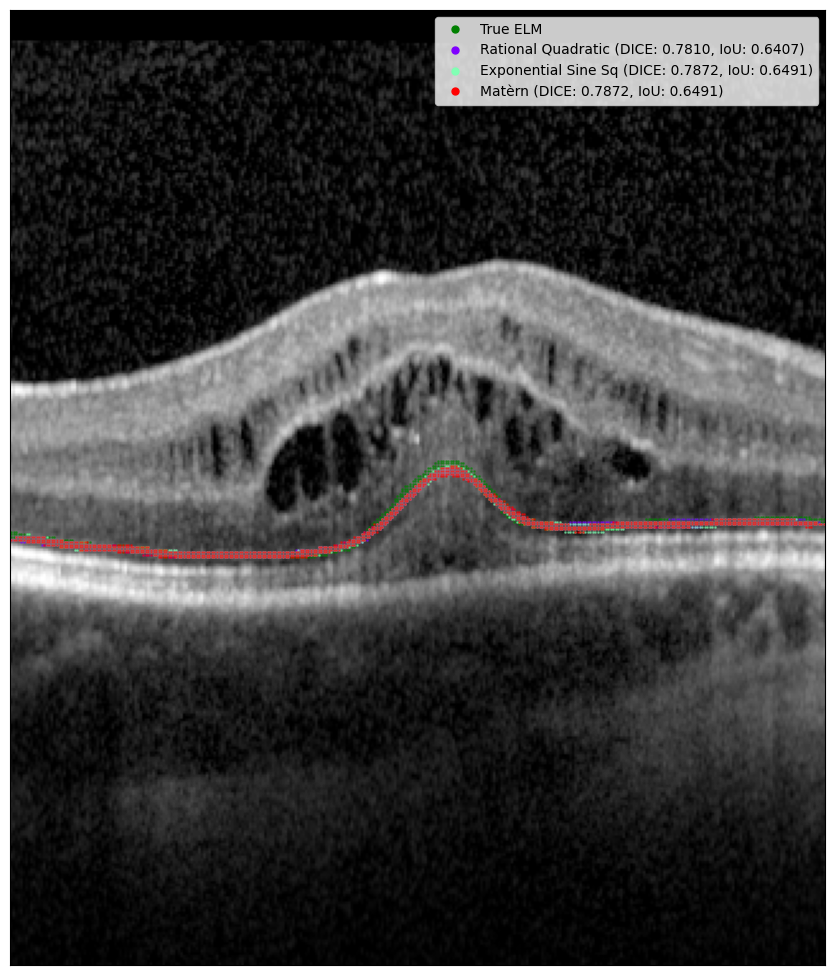

In [23]:
predictions = {
    'Rational Quadratic': rq,
    'Exponential Sine Sq': ess,
    'Matèrn': m
}

figs['Kernel_Comp_No_MH'] = vis.display_scan(test_scan, predictions, gt_elm=test_gt)

In [55]:
sn_metrics = metrics.calculate_all_metrics(test_init, test_gt, test_scan.shape)
sn_metrics

{'Dice': 0.7844202898550725,
 'IoU': 0.6453055141579732,
 'Sensitivity': 0.8040854224698236,
 'FPR': 0.0022153671239518806,
 'RMSE': 0.06279962316117345,
 'Hausdorff Distance': 5.477225575051661}

In [24]:
rq_metrics = metrics.calculate_all_metrics(rq, test_gt, test_scan.shape)
rq_metrics

{'Dice': 0.7810361681329423,
 'IoU': 0.640737770649559,
 'Sensitivity': 0.7418755803156918,
 'FPR': 0.00142117890970498,
 'RMSE': 0.060924583421765495,
 'Hausdorff Distance': 5.385164807134504}

In [25]:
ess_metrics = metrics.calculate_all_metrics(ess, test_gt, test_scan.shape)
ess_metrics

{'Dice': 0.7872137404580153,
 'IoU': 0.6490952006294256,
 'Sensitivity': 0.766016713091922,
 'FPR': 0.0016218159322515654,
 'RMSE': 0.06078843893111675,
 'Hausdorff Distance': 5.385164807134504}

In [27]:
m_metrics = metrics.calculate_all_metrics(m, test_gt, test_scan.shape)
m_metrics

{'Dice': 0.7872137404580153,
 'IoU': 0.6490952006294256,
 'Sensitivity': 0.766016713091922,
 'FPR': 0.0016218159322515654,
 'RMSE': 0.06078843893111675,
 'Hausdorff Distance': 5.830951894845301}

In [32]:
idx_mh = idx_list[200]
mh_scan = scans[idx_mh]
mh_grad = grads[idx_mh]
mh_init = inits[idx_mh]
mh_gt = gts[idx_mh]

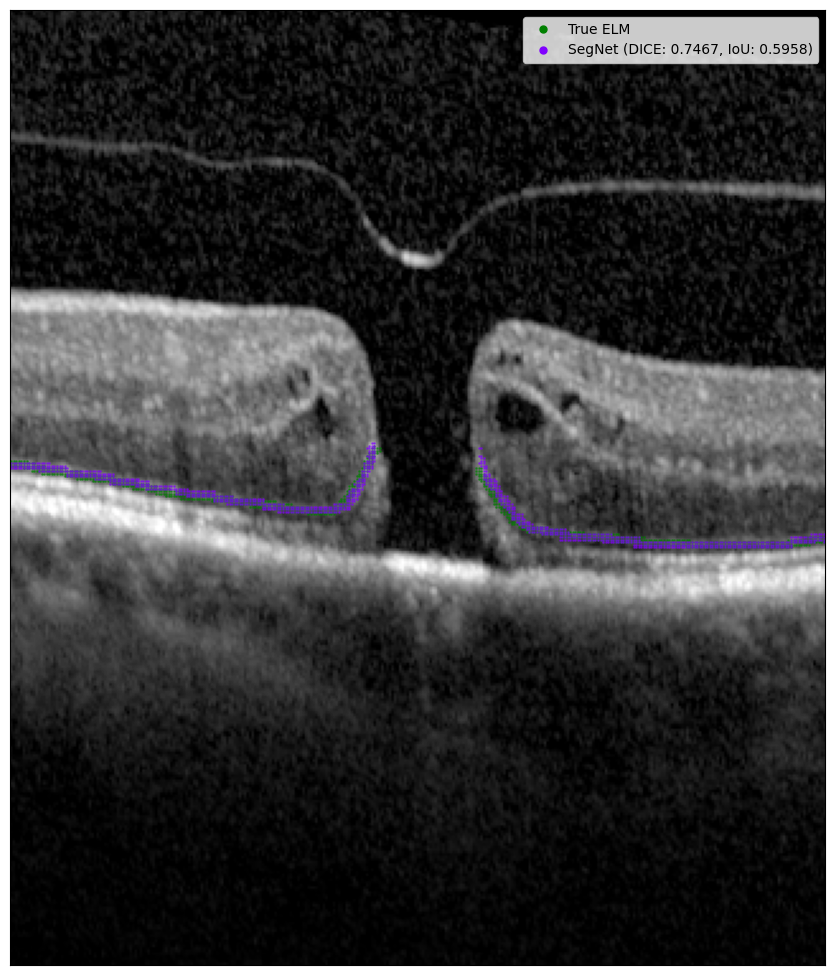

In [35]:
figs = {}
figs['SegNet_MH'] = vis.display_scan(mh_scan, {'SegNet': mh_init}, gt_elm=mh_gt)

In [44]:
rq_mh = predict.trace_elm(mh_grad, mh_init, num_runs=100, kernel_options=rational_quad1)
print('RQ done.')
ess_mh = predict.trace_elm(mh_grad, mh_init, num_runs=100, kernel_options=exp_sine_sq1)
print('ESS done.')
matern_mh = predict.trace_elm(mh_grad, mh_init, num_runs=100, kernel_options=matern1)
print('Matern done.')

RQ done.
ESS done.
Matern done.


In [47]:
rq_try1 = predict.trace_elm(mh_grad, mh_init, num_runs=100, kernel_options=rational_quad1)

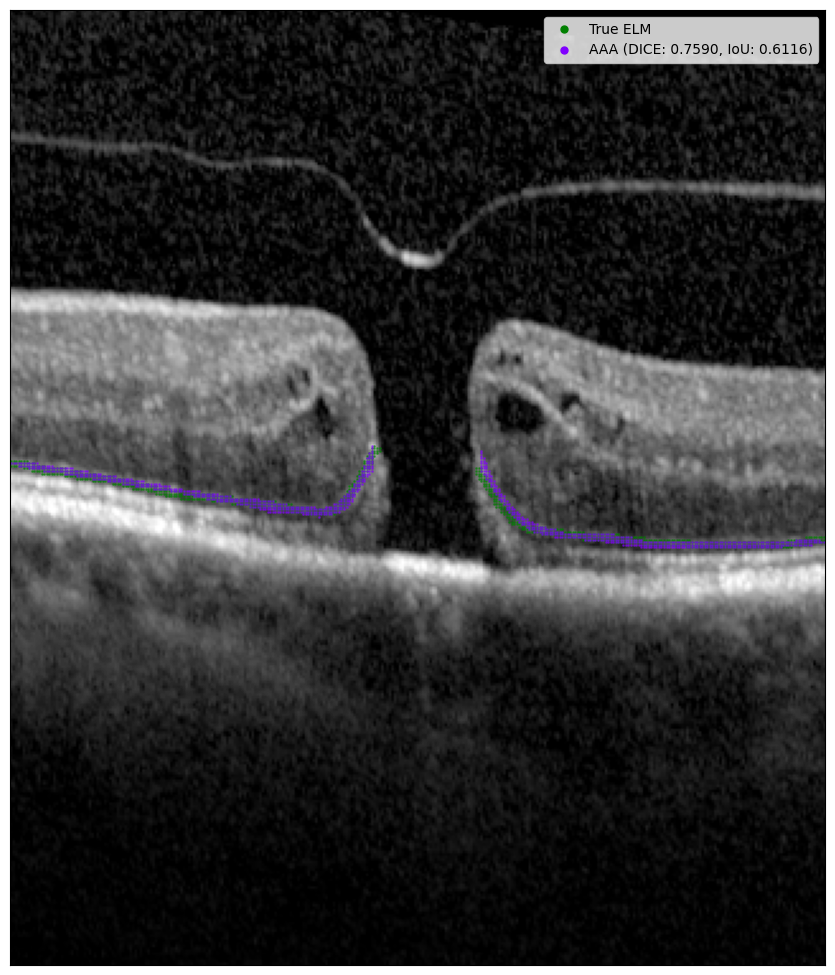

In [51]:
ess_try1 = predict.trace_elm(mh_grad, mh_init, num_runs=100, kernel_options=exp_sine_sq1)

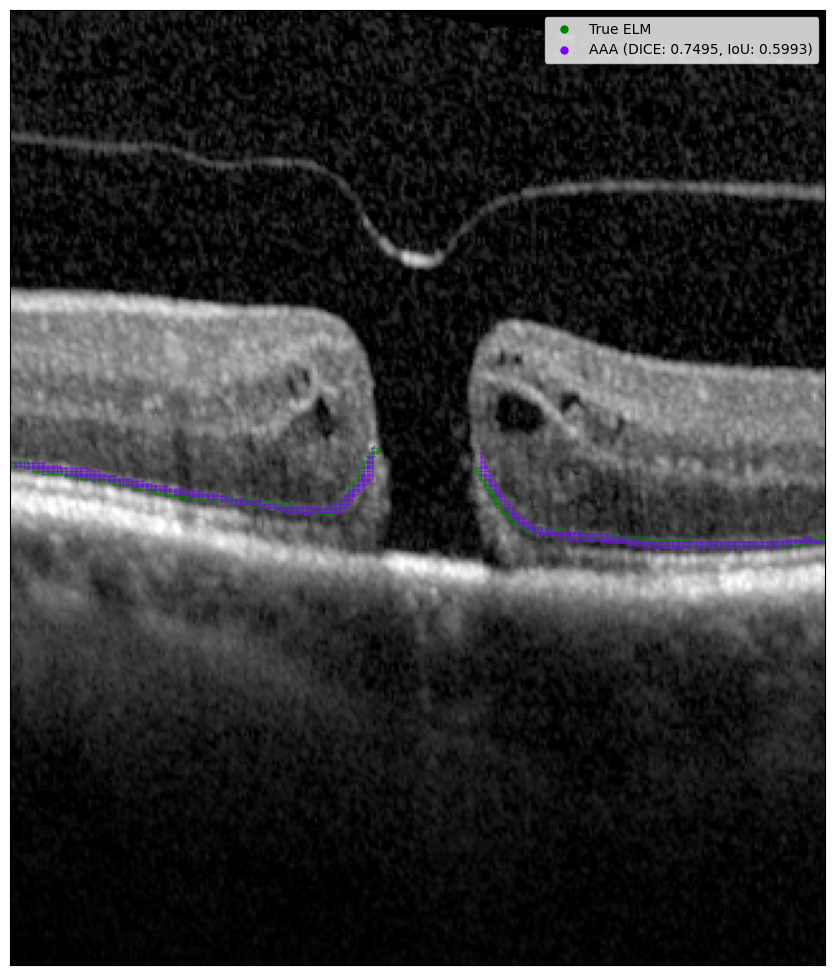

In [52]:
matern_try1 = predict.trace_elm(mh_grad, mh_init, kernel_options=matern1, num_runs=100)

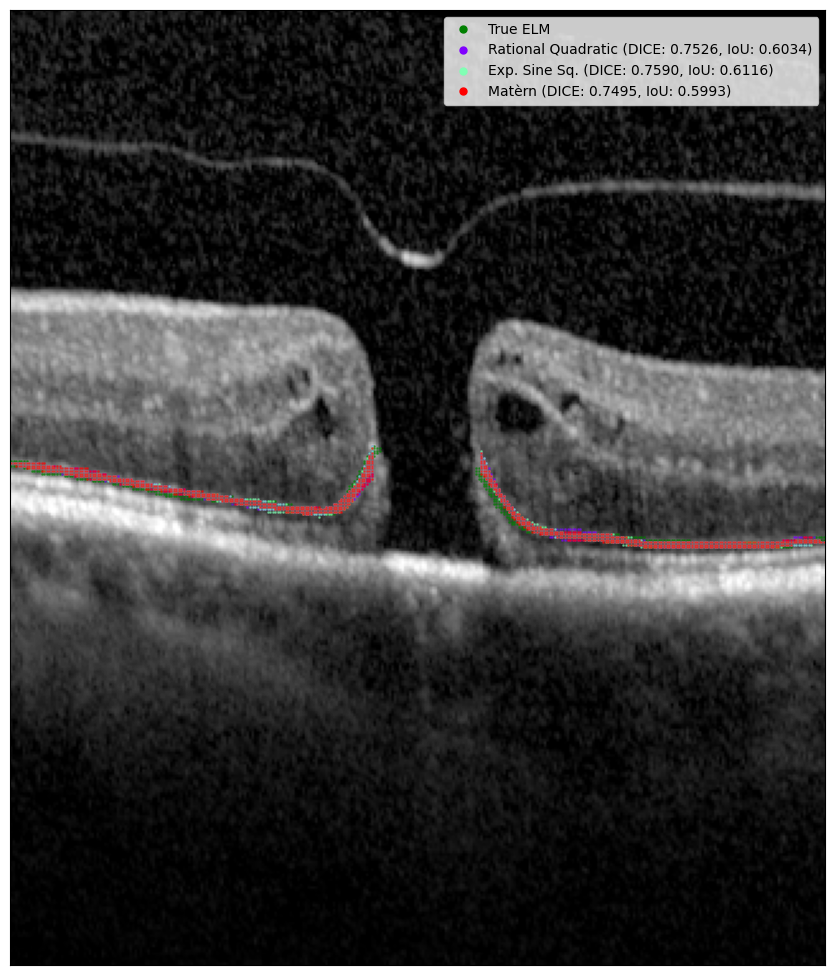

In [54]:
predictions_mh = {
    'Rational Quadratic': rq_try1,
    'Exp. Sine Sq.': ess_try1,
    'Matèrn': matern_try1
}

figs['Kernel_Comp_MH'] = vis.display_scan(mh_scan, predictions_mh, gt_elm=mh_gt)

In [56]:
!jupyter nbconvert --to script --no-prompt 3_3_kernel.ipynb

[NbConvertApp] Converting notebook 3_3_kernel.ipynb to script
[NbConvertApp] Writing 1525 bytes to 3_3_kernel.py
